#### Fake News Classifier with NLP

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
#get the independent features
x = df.drop('label',axis=1)

In [5]:
x.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [6]:
#getting dependent features
y= df['label']

In [7]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [9]:
df.shape

(20800, 5)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [11]:
df = df.dropna()

In [12]:
df.shape

(18285, 5)

In [13]:
messages=df.copy()

In [14]:
messages.reset_index(inplace=True)

In [16]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [49]:
# clearing and preprocessing
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]',' ',messages['title'][i])
    reivew=review.lower()
    review=review.split()
    
    review =[ps.stem(word)for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [50]:
corpus

['hous dem aid We didn even see comey letter until jason chaffetz tweet It',
 'flynn hillari clinton big woman campu breitbart',
 'whi truth might get you fire',
 'civilian kill In singl US airstrik have been identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump He bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin the new york time',
 'A back channel plan ukrain russia courtesi trump associ the new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'US offici see No link between trump russia',
 'Re ye there are paid govern troll On social media blog forum and websit',
 'In major leagu soccer argentin find home success the new york time',
 'well fargo chief abruptli step down the new york

In [51]:
#Apply countvectarizer
# creating the Bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [52]:
X.shape

(18285, 5000)

In [53]:
y=messages['label']

In [54]:
#divided the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [55]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc new',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'about',
 'about elect',
 'about elect violenc',
 'about emf',
 'about emf damag',
 'about hillari',
 'about it',
 'about the',
 'about to',
 'about trump',
 'abov',
 'abroad']

In [56]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [57]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [58]:
count_df.head()

,abandon,abc,abc new,abduct,abe,abedin,abl,abort,about,about elect,...,zealand,zero,zika,zika viru,zionist,zone,zone the,zone the new,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
import matplotlib.pyplot as plt

In [77]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### MultinominalNB algorithem

In [78]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [79]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.900
Confusion matrix, without normalization


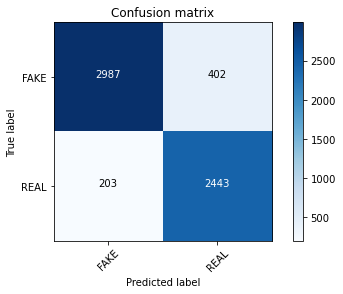

In [81]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [82]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.899751449875725

In [83]:
y_train.shape

(12250,)

#### Passive Aggressive Classifier Algorithm

In [86]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [88]:
linear_clf = PassiveAggressiveClassifier()

accuracy:   0.925
Confusion matrix, without normalization


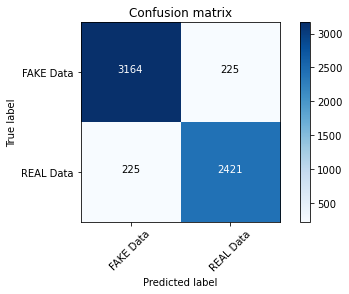

In [89]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

#### Multinomial Classifier with Hyperparameter

In [90]:
classifier=MultinomialNB(alpha=0.1)

In [91]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

F:\python\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score : 0.8922949461474731
Alpha: 0.1, Score : 0.9019055509527755
Alpha: 0.2, Score : 0.9014084507042254
Alpha: 0.30000000000000004, Score : 0.9017398508699255
Alpha: 0.4, Score : 0.9009113504556753
Alpha: 0.5, Score : 0.9009113504556753
Alpha: 0.6000000000000001, Score : 0.899917149958575
Alpha: 0.7000000000000001, Score : 0.9002485501242751
Alpha: 0.8, Score : 0.9004142502071251
Alpha: 0.9, Score : 0.899917149958575


In [92]:
## Get Features names
feature_names = cv.get_feature_names()

In [94]:
classifier.coef_[0]

array([ -9.31620688,  -8.83857933,  -9.31620688, ..., -11.0108026 ,
        -9.13048974,  -9.54446553])

In [95]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-3.974067942582031, 'the'),
 (-4.215967203828887, 'trump'),
 (-4.503690741667443, 'hillari'),
 (-4.597525811606959, 'to'),
 (-4.6122076682854205, 'clinton'),
 (-4.97611893659267, 'in'),
 (-5.097599942581823, 'is'),
 (-5.1127334033122, 'new'),
 (-5.115787773432637, 'elect'),
 (-5.201993001407839, 'of'),
 (-5.232462521661646, 'for'),
 (-5.450548413572669, 'comment'),
 (-5.4897862281975325, 'video'),
 (-5.602634815341913, 'war'),
 (-5.612639901302876, 'us'),
 (-5.617680234554282, 'and'),
 (-5.6227461015177225, 'it'),
 (-5.627837762212307, 'hillari clinton'),
 (-5.632955480649287, 'fbi'),
 (-5.685626948769723, 'what')]

In [97]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:100]

[(-11.010802602820629, 'abe'),
 (-11.010802602820629, 'abroad'),
 (-11.010802602820629, 'abus the'),
 (-11.010802602820629, 'abus the new'),
 (-11.010802602820629, 'act the'),
 (-11.010802602820629, 'act the new'),
 (-11.010802602820629, 'advic'),
 (-11.010802602820629, 'again breitbart'),
 (-11.010802602820629, 'again the'),
 (-11.010802602820629, 'again the new'),
 (-11.010802602820629, 'age the'),
 (-11.010802602820629, 'age the new'),
 (-11.010802602820629, 'ail'),
 (-11.010802602820629, 'aleppo the'),
 (-11.010802602820629, 'aleppo the new'),
 (-11.010802602820629, 'ali'),
 (-11.010802602820629, 'america breitbart'),
 (-11.010802602820629, 'america the new'),
 (-11.010802602820629, 'ami'),
 (-11.010802602820629, 'ami schumer'),
 (-11.010802602820629, 'amp'),
 (-11.010802602820629, 'ann'),
 (-11.010802602820629, 'ann coulter'),
 (-11.010802602820629, 'applaud'),
 (-11.010802602820629, 'arson'),
 (-11.010802602820629, 'assail'),
 (-11.010802602820629, 'athlet'),
 (-11.01080260282062